In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Merged_GNSS_and_SNR_Data.csv'
gnss_data = pd.read_csv(file_path)

# Convert 'TIME' column to datetime and specify dayfirst=True to handle the format
gnss_data['TIME'] = pd.to_datetime(gnss_data['TIME'], dayfirst=True)
gnss_data['Time_seconds'] = (gnss_data['TIME'] - gnss_data['TIME'].min()).dt.total_seconds()

# Define features (including time) and target variable
features = ['Time_seconds', 'Phase (m)', 'STD of Pseudorange L1 (m)', 'STD of Pseudorange L2 (m)',
            'Elevation', 'Azimuth', 'SNR(dBHz)', 'L1 MP(m)']
target = 'Pseudorange Residual (m)'

# Drop rows with missing values
gnss_data_clean = gnss_data.dropna(subset=features + [target])

# Split data into features (X) and target (y)
X = gnss_data_clean[features]
y = gnss_data_clean[target]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets, maintaining time-based order
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Random Forest

RMS of Original Pseudorange Residual (M_original): 0.8070 meters
RMS after model prediction (M_m): 0.4529 meters
Improvement Rate: 43.88%


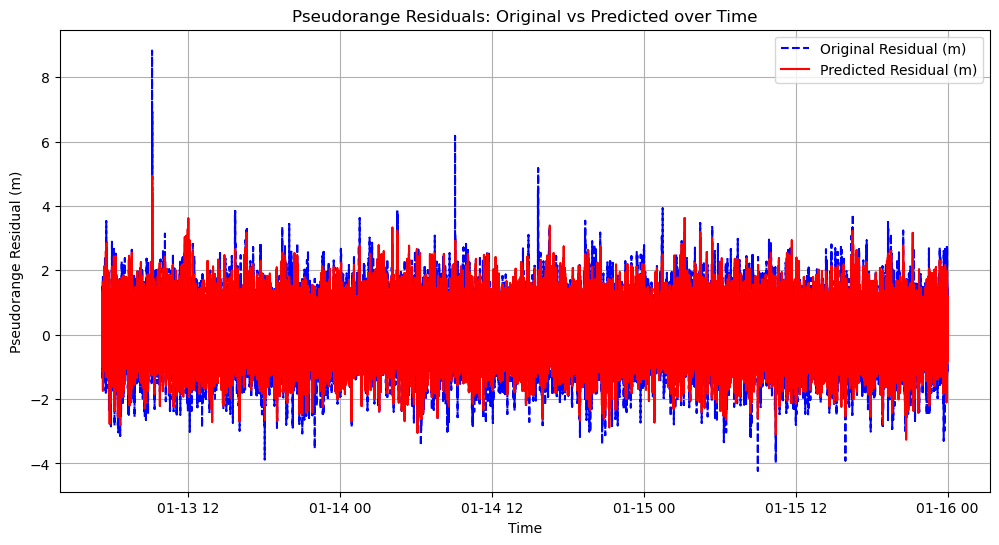

In [2]:
# Initialize and train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the pseudorange residuals
y_pred = rf_model.predict(X_test)

# Calculate RMS for the original and model-predicted residuals
a1 = np.sqrt(mean_squared_error(y_test, np.zeros_like(y_test)))  # RMS of original data
a2 = np.sqrt(mean_squared_error(y_test, y_pred))  # RMS after model prediction

# Calculate improvement rate
improvement_rate = (a1 - a2) / a1

# Print the results
print(f'RMS of Original Pseudorange Residual (M_original): {a1:.4f} meters')
print(f'RMS after model prediction (M_m): {a2:.4f} meters')
print(f'Improvement Rate: {improvement_rate * 100:.2f}%')

# Plot the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred):], y_pred, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()

# FCNN

Epoch 1/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 258us/step - loss: 0.2413
Epoch 2/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 250us/step - loss: 0.2265
Epoch 3/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 249us/step - loss: 0.2239
Epoch 4/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 253us/step - loss: 0.2203
Epoch 5/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 253us/step - loss: 0.2207
Epoch 6/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 252us/step - loss: 0.2175
Epoch 7/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 250us/step - loss: 0.2170
Epoch 8/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 253us/step - loss: 0.2156
Epoch 9/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 254us/step - loss: 0.2153
Epoch 10/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 255us/step - loss: 0.2139
Epoch 11/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 254us/step - loss: 0.2131
Epoch 12/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 256us/step - loss: 0.2127
Epoch 13/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 255us/step - loss: 0.2120
Epoch 14/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 257us/step - loss: 0.2116
Epoch 15/50


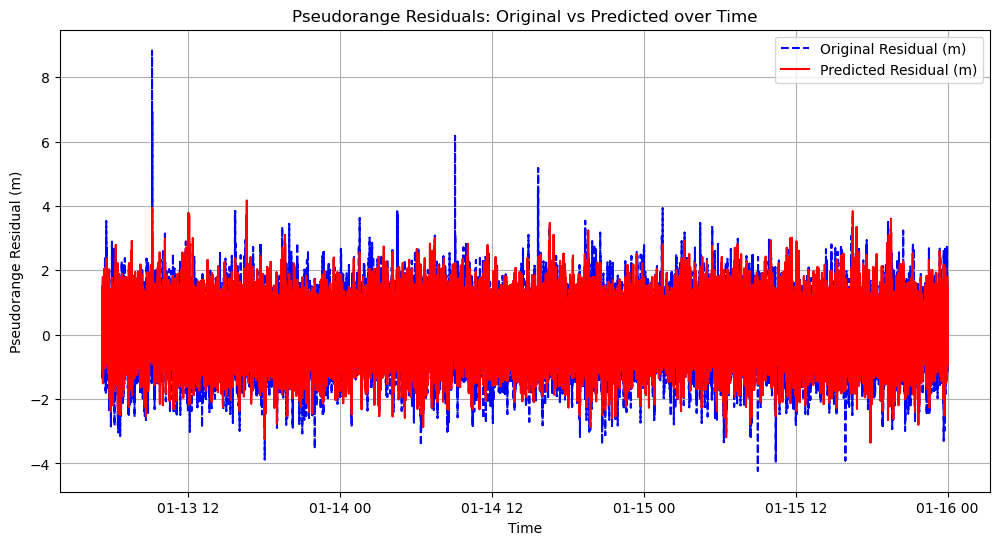

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the FCNN model
fcnn_model = Sequential()
fcnn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
fcnn_model.add(Dense(32, activation='relu'))
fcnn_model.add(Dense(1))

# Compile the model
fcnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
fcnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting
y_pred_fcnn = fcnn_model.predict(X_test)

# Calculate RMS for FCNN
a2_fcnn = np.sqrt(mean_squared_error(y_test, y_pred_fcnn))
improvement_rate_fcnn = (a1 - a2_fcnn) / a1

print(f'RMS of FCNN: {a2_fcnn:.4f} meters')
print(f'Improvement Rate: {improvement_rate_fcnn * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_fcnn):], y_pred_fcnn, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# CNN

Epoch 1/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 289us/step - loss: 0.2429
Epoch 2/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 296us/step - loss: 0.2268
Epoch 3/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 298us/step - loss: 0.2236
Epoch 4/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 297us/step - loss: 0.2185
Epoch 5/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 305us/step - loss: 0.2177
Epoch 6/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 341us/step - loss: 0.2175
Epoch 7/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 350us/step - loss: 0.2155
Epoch 8/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 346us/step - loss: 0.2150
Epoch 9/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 349us/step - loss: 0.2150
Epoch 10/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 348us/step - loss: 0.2125
Epoch 11/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 331us/step - loss: 0.2125
Epoch 12/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 316us/step - loss: 0.2122
Epoch 13/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 314us/step - loss: 0.2117
Epoch 14/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 309us/step - loss: 0.2091
Epoch 15/50


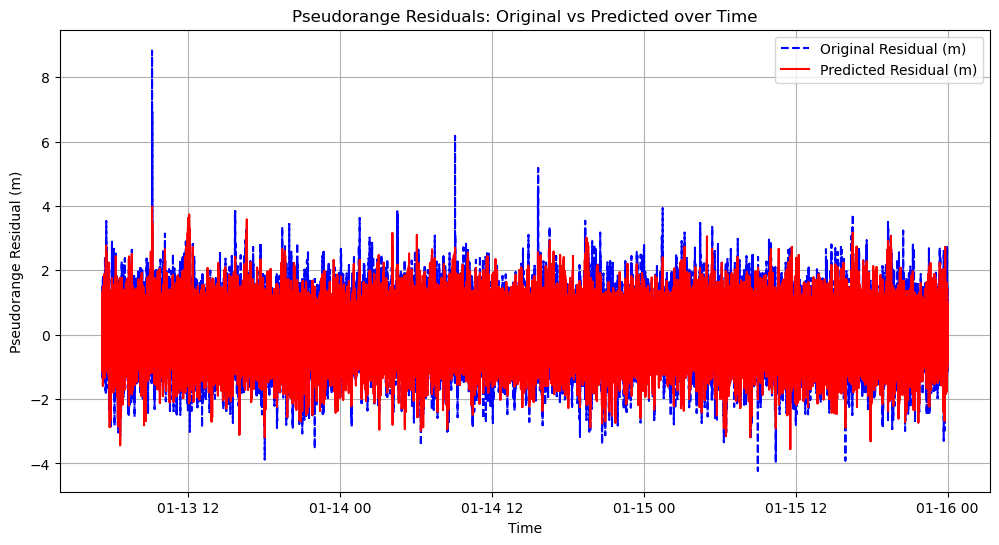

In [4]:
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Reshape the input data for CNN
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(1))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting
y_pred_cnn = cnn_model.predict(X_test_cnn)

# Calculate RMS for CNN
a2_cnn = np.sqrt(mean_squared_error(y_test, y_pred_cnn))
improvement_rate_cnn = (a1 - a2_cnn) / a1

print(f'RMS of CNN: {a2_cnn:.4f} meters')
print(f'Improvement Rate: {improvement_rate_cnn * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_cnn):], y_pred_cnn, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# RNN/LSTM

Epoch 1/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9388/9388 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.2540
Epoch 2/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.2271
Epoch 3/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.2236
Epoch 4/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.2224
Epoch 5/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.2194
Epoch 6/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.2168
Epoch 7/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.2152
Epoch 8/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.2130
Epoch 9/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.2104
Epoch 10/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.2086
Epoch 11/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.2062
Epoch 12/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.2043
Epoch 13/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.2025
Epoch 14/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.1993
Epoch 15/50
9388/9388 ━━━━

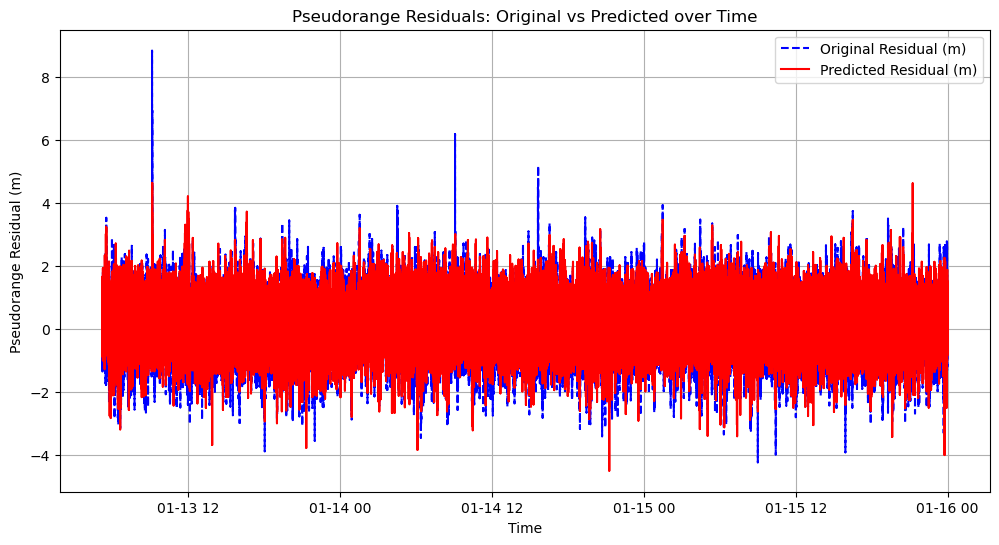

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Reshape the input data for LSTM
X_train_rnn = np.expand_dims(X_train, axis=2)
X_test_rnn = np.expand_dims(X_test, axis=2)

# Define the LSTM model
rnn_model = Sequential()
rnn_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_rnn.shape[1], 1)))
rnn_model.add(LSTM(50))
rnn_model.add(Dense(1))

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting
y_pred_rnn = rnn_model.predict(X_test_rnn)

# Calculate RMS for LSTM
a2_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
improvement_rate_rnn = (a1 - a2_rnn) / a1

print(f'RMS of LSTM: {a2_rnn:.4f} meters')
print(f'Improvement Rate: {improvement_rate_rnn * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_rnn):], y_pred_rnn, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# Decision Tree Regressor

RMS of Decision Tree: 0.6812 meters
Improvement Rate: 15.58%


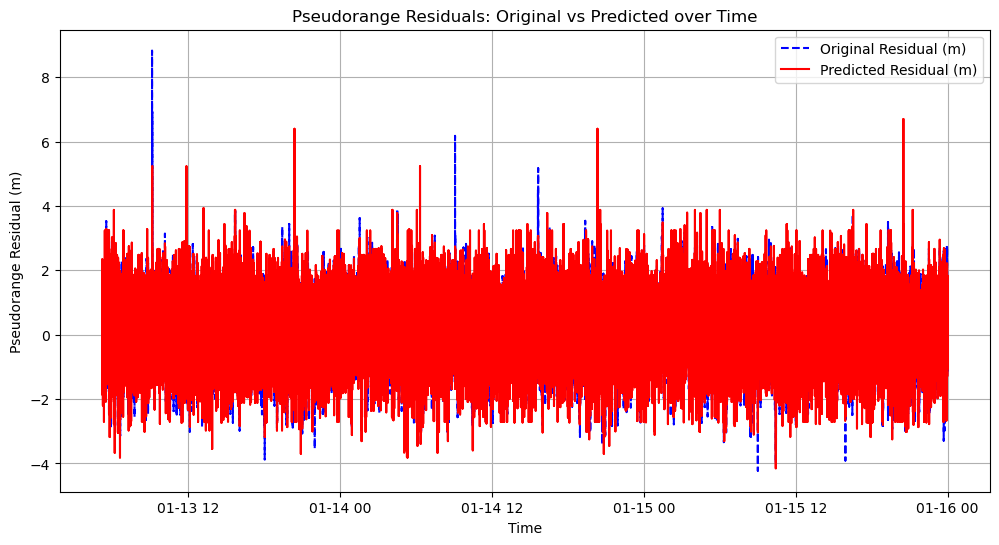

In [6]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting
y_pred_dt = dt_model.predict(X_test)

# Calculate RMS for Decision Tree
a2_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
improvement_rate_dt = (a1 - a2_dt) / a1

print(f'RMS of Decision Tree: {a2_dt:.4f} meters')
print(f'Improvement Rate: {improvement_rate_dt * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_dt):], y_pred_dt, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# Linear Regression

RMS of Linear Model: 0.4876 meters
Improvement Rate: 39.58%


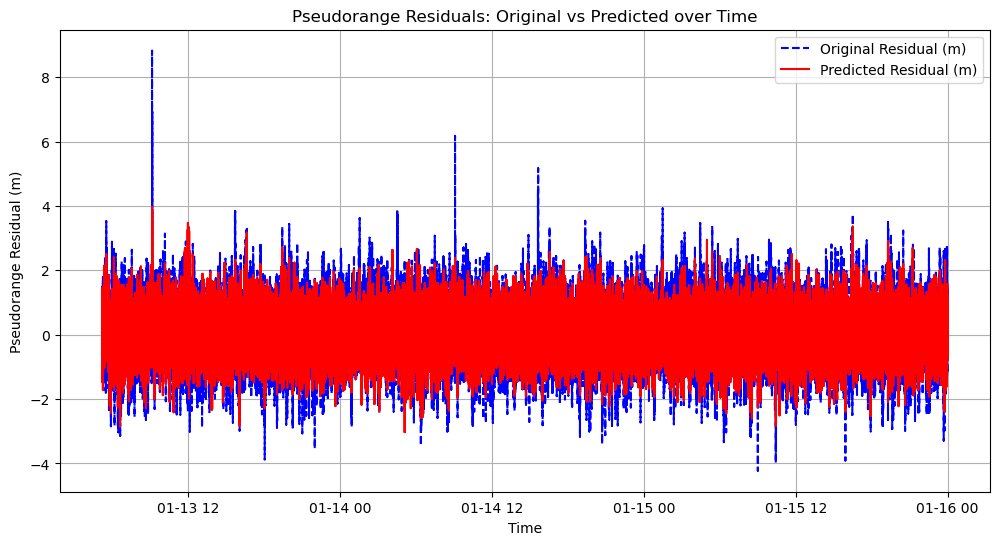

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting
y_pred_linear = linear_model.predict(X_test)

# Calculate RMS for Linear Model
a2_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
improvement_rate_linear = (a1 - a2_linear) / a1

print(f'RMS of Linear Model: {a2_linear:.4f} meters')
print(f'Improvement Rate: {improvement_rate_linear * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_linear):], y_pred_linear, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# Support Vector Regression (SVR)

RMS of RBF SVR Model (Downsampled): 0.4948 meters
Improvement Rate: 38.68%


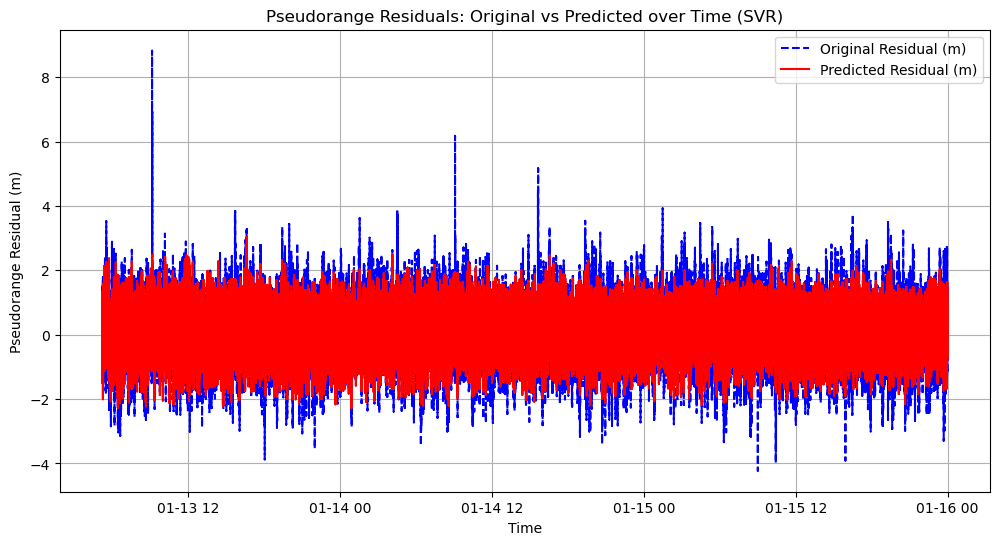

In [8]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

# Downsample the data (e.g., to 50% of the original data)
X_train_downsampled, y_train_downsampled = resample(X_train, y_train, n_samples=int(len(X_train) * 0.5), random_state=42)

# Scaling the downsampled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_downsampled)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model with 'rbf' kernel
svm_model_rbf = SVR(kernel='rbf', cache_size=200, tol=1e-3)
svm_model_rbf.fit(X_train_scaled, y_train_downsampled)

# Predicting
y_pred_svm_rbf = svm_model_rbf.predict(X_test_scaled)

# Calculate RMS for SVR with RBF kernel
a2_svm_rbf = np.sqrt(mean_squared_error(y_test, y_pred_svm_rbf))
improvement_rate_svm_rbf = (a1 - a2_svm_rbf) / a1

print(f'RMS of RBF SVR Model (Downsampled): {a2_svm_rbf:.4f} meters')
print(f'Improvement Rate: {improvement_rate_svm_rbf * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_svm_rbf):], y_pred_svm_rbf, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time (SVR)')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to create the CNN model (for KerasRegressor)
def create_cnn(filters=64, kernel_size=2, activation='relu'):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation=activation, input_shape=(X_train_cnn.shape[1], 1)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Reshape the input data for CNN
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Wrap the model using KerasRegressor from scikeras, passing the default values for filters and kernel_size
cnn_model = KerasRegressor(model=create_cnn, verbose=1)

# Define the parameter grid for tuning
param_grid = {
    'model__filters': [32, 64, 128],  # Pass filters as model__filters
    'model__kernel_size': [2, 3, 4],  # Pass kernel_size as model__kernel_size
    'epochs': [10, 20, 50],           # epochs stays the same
    'batch_size': [32, 64],           # batch_size stays the same
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=cnn_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_cnn, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to predict
best_cnn_model = grid_search.best_estimator_
y_pred_cnn_tuned = best_cnn_model.predict(X_test_cnn)

# Calculate RMS for the tuned CNN model
a2_cnn_tuned = np.sqrt(mean_squared_error(y_test, y_pred_cnn_tuned))
improvement_rate_cnn_tuned = (a1 - a2_cnn_tuned) / a1

print(f'RMS of Tuned CNN: {a2_cnn_tuned:.4f} meters')
print(f'Improvement Rate: {improvement_rate_cnn_tuned * 100:.2f}%')


Fitting 3 folds for each of 54 candidates, totalling 162 fits


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 814us/step - loss: 0.2462
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 855us/step - loss: 0.2447
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 882us/step - loss: 0.2451
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 915us/step - loss: 0.2508
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 933us/step - loss: 0.2529
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 962us/step - loss: 0.2457
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 971us/step - loss: 0.2493
 613/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 860us/step - loss: 0.2275Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 977us/step - loss: 0.2551
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 996us/step - loss: 0.2533 
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.24916
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.245969
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 697us/step - loss: 0.217
4764/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - loss: 0.2120[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=2; total time=  58.8s
Epoch 1/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 778us/step - loss: 0.2128
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 883us/step - loss: 0.2173
Epoch 10/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 662us/step0.2122   0.211
 355/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 428us/step - loss: 0.2107[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=3; total time=  59.8s
Epoch 1/10
 612/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 413us/step - loss: 0.2104

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 824us/step - loss: 0.2119
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 791us/step - loss: 0.2118
1876/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 646us/step - loss: 0.2140[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=3; total time= 1.0min
Epoch 1/10
1975/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 639us/step - loss: 0.2142

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 672us/step - loss: 0.211
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 649us/step - loss: 0.214
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 824us/step - loss: 0.2164
Epoch 10/10
 792/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 702us/step - loss: 0.2219[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=2; total time= 1.0min
Epoch 1/10
3487/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - loss: 0.2155

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 531/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 764us/step - loss: 0.3009[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=4; total time= 1.0min
Epoch 1/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 708us/step - loss: 0.215
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 662us/step - loss: 0.285
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 543us/step - loss: 0.275
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 684us/step - loss: 0.2159
5365/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.2515[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=2; total time= 1.1min
Epoch 1/10
2505/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 686us/step - loss: 0.2573

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

5470/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.2163[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=2; total time= 1.1min
Epoch 1/10
1036/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 716us/step - loss: 0.2785[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=4; total time= 1.1min
Epoch 1/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 684us/step - loss: 0.2164
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 718us/step - loss: 0.2492
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 759us/step - loss: 0.2525
Epoch 2/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - loss: 0.264
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 756us/step - loss: 0.2444
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 816us/step - loss: 0.2184
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 882us/step0.21oss: 0.235
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 831us/step - loss: 0.234
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 841us/step - loss: 0.2448
Epoch 2/10
4842/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - loss: 0.2571

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6247/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 0.2497[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=2; total time= 1.1min
Epoch 1/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 854us/step - loss: 0.2496
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 816us/step - loss: 0.2525
Epoch 2/10
2576/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=4; total time= 1.1min
Epoch 1/10
[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=2; total time= 1.1min
Epoch 1/10
   1/6259 ━━━━━━━━━━━━━━━━━━━━ 2:38 25ms/step - loss: 0.3123

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 862us/step - loss: 0.2254
Epoch 3/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 859us/step - loss: 0.2480
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 871us/step - loss: 0.2458
Epoch 2/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step0.42 loss: 0.2279
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 820us/step - loss: 0.2294
Epoch 3/10
 941/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 915us/step - loss: 0.2817[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=3; total time= 1.2min
Epoch 1/10
1303/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 932us/step - loss: 0.2281

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 822us/step - loss: 0.2245
Epoch 3/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 834us/step - loss: 0.2252
Epoch 3/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 855us/step - loss: 0.2286
3627/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - loss: 0.2570Epoch 3/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 907us/step - loss: 0.2271
Epoch 3/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 955us/step - loss: 0.22593
Epoch 3/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 991us/step - loss: 0.2296
3973/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2494Epoch 3/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.24589
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2489
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.251282
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 975us/step - loss: 0.2236
Epoch 4/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.24477
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 981us/step - loss: 0.2208
Epoch 4/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 9

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 824us/step - loss: 0.2144
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 803us/step - loss: 0.266
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 946us/step - loss: 0.2160
Epoch 9/10
5675/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.2178[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=4; total time= 1.1min
Epoch 1/10
5716/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.2178

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 878us/step - loss: 0.2169
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 957us/step - loss: 0.2177
3357/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2105Epoch 10/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 813us/step - loss: 0.2163
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 954us/step - loss: 0.2159
Epoch 10/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.213
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.21224
Epoch 10/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 867us/step - loss: 0.216
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 948us/step - loss: 0.2167
5417/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.2472[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=3; total time= 1.2min
Epoch 1/10
3074/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 0.240

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1607/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 942us/step - loss: 0.2105[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=4; total time= 1.2min
Epoch 1/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 976us/step - loss: 0.2110
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 979us/step
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 863us/step - loss: 0.2455
Epoch 2/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 915us/step - loss: 0.214
5028/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - loss: 0.2148

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2951/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - loss: 0.2113[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=4; total time= 1.2min
Epoch 1/20
1454/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=3; total time= 1.3min
Epoch 1/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 958us/step - loss: 0.2150
Epoch 10/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.264
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.213
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 975us/step - loss: 0.2176
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 948us/step - loss: 0.2145
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 895us/step - loss: 0.2503
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 925us/step - loss: 0.2115
2871/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 755us/step - loss: 0.2576

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 965/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=2; total time= 1.2min
Epoch 1/20
4673/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - loss: 0.2466[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=2; total time= 1.2min
Epoch 1/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 792us/step - loss: 0.2432
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 884us/step - loss: 0.2240
Epoch 3/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 887us/step - loss: 0.2483
Epoch 2/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 898us/step - loss: 0.270
3482/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 887us/step - loss: 0.2299[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=2; total time= 1.2min
Epoch 1/20
5958/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.2466

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 805us/step - loss: 0.2459
1808/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 820us/step - loss: 0.2252Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 891us/step - loss: 0.227
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 814us/step - loss: 0.2492
Epoch 2/20
3251/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 766us/step - loss: 0.2582[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=3; total time= 1.2min
Epoch 1/20
 108/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 944us/step - loss: 0.4159s: 0.232

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 939us/step - loss: 0.2158
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 904us/step - loss: 0.2294
Epoch 3/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 813us/step - loss: 0.228
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 852us/step - loss: 0.2475
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 842us/step - loss: 0.2531
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 876us/step - loss: 0.2248
Epoch 3/20
 826/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 767us/step - loss: 0.2328[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=3; total time= 1.3min
Epoch 1/20
5975/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.2218

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 924us/step - loss: 0.2218
Epoch 4/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 901us/step - loss: 0.2261
Epoch 3/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 798us/step - loss: 0.2295
Epoch 3/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 802us/step - loss: 0.2255
Epoch 3/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 936us/step - loss: 0.2456
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 792us/step - loss: 0.2502
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 915us/step - loss: 0.2256
3620/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - loss: 0.2199Epoch 4/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 794us/step - loss: 0.224
5892/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.2300[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=3; total time= 1.3min
Epoch 1/20
4122/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - loss: 0.2267

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 832us/step - loss: 0.2299
Epoch 3/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 849us/step - loss: 0.2244
Epoch 3/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 848us/step - loss: 0.2524
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 822us/step - loss: 0.2261
Epoch 4/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 937us/step - loss: 0.2195
Epoch 5/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 942us/step - loss: 0.2210
Epoch 4/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 870us/step - loss: 0.2239
Epoch 4/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 881us/step - loss: 0.2246
Epoch 3/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 918us/step - loss: 0.2270
Epoch 3/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 762us/step - loss: 0.2210
5695/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.2210Epoch 4/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 799us/step - loss: 0.2242
4762/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - loss: 0.2580Epoch 4/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 929us/step - loss: 0.2223
Epoch 5/10
6259/6259 ━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 884us/step loss: 0.21123
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 859us/step - loss: 0.2134
Epoch 10/20
2901/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 735us/step - loss: 0.2145

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4467/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - loss: 0.2102[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=4; total time= 1.2min
Epoch 1/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 920us/step - loss: 0.2135
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 805us/step - loss: 0.2176
Epoch 8/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 797us/step - loss: 0.2108
Epoch 12/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 788us/step - loss: 0.2179
Epoch 12/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 730us/step - loss: 0.2127
Epoch 12/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 755us/step - loss: 0.2154
Epoch 11/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 868us/step - loss: 0.2149
Epoch 11/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 633us/step - loss: 0.212
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 801us/step - loss: 0.2103
Epoch 12/20
3330/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 741us/step - loss: 0.2157[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=4; total time= 1.1min
Epoch 1/20
1385/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 788us/step -

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 888us/step - loss: 0.2459
4680/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - loss: 0.2161Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 859us/step - loss: 0.2463
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 907us/step - loss: 0.2164
Epoch 9/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 916us/step - loss: 0.2124
Epoch 13/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 910us/step - loss: 0.2161
Epoch 13/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 954us/step - loss: 0.2136
Epoch 13/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 956us/step - loss: 0.2146
Epoch 12/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.21344
Epoch 12/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 11s 934us/step - loss: 0.2167
Epoch 10/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 885us/step - loss: 0.2099
Epoch 11/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21034
Epoch 13/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.24665
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.22403
Epoch 3/20
6259/6259 ━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 780us/step loss: 0.21213
 233/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 652us/step - loss: 0.3476[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=2; total time= 2.1min
Epoch 1/20
1111/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.21593

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 901us/step - loss: 0.2122
Epoch 18/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 942us/step - loss: 0.2151
Epoch 10/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 941us/step - loss: 0.2109
Epoch 18/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 881us/step - loss: 0.2053
Epoch 20/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 979us/step - loss: 0.2102
Epoch 20/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 864us/step - loss: 0.2124
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 977us/step - loss: 0.2061
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.252
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 989us/step - loss: 0.2109
Epoch 11/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.21532
Epoch 11/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 994us/step - loss: 0.2449
Epoch 2/20
4938/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2145

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5023/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2145[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=2; total time= 2.2min
Epoch 1/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 856us/step loss: 0.21213
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 869us/step - loss: 0.2110
Epoch 19/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 957us/step - loss: 0.2493
Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 928us/step - loss: 0.200
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 887us/step - loss: 0.2068
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.21451
Epoch 11/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 952us/step - loss: 0.2095
Epoch 19/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 894us/step - loss: 0.2111
1600/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 821us/step - loss: 0.2319

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 760/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 806us/step - loss: 0.2098[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=3; total time= 2.1min
Epoch 1/20
1621/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 829us/step - loss: 0.2167[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=3; total time= 2.2min
Epoch 1/20
2621/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - loss: 0.2311

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 638us/step - loss: 0.229
 873/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 759us/step - loss: 0.2078

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4247/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - loss: 0.2306[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=4; total time= 2.1min
Epoch 1/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 836us/step - loss: 0.2123
Epoch 12/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 912us/step - loss: 0.202
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 771us/step - loss: 0.2248
Epoch 3/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 915us/step - loss: 0.2103
Epoch 20/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 867us/step - loss: 0.2302
Epoch 3/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 850us/step - loss: 0.2091
Epoch 20/20
5853/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 0.2159

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3520/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - loss: 0.2532[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=3; total time= 2.2min
Epoch 1/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 940us/step - loss: 0.2469
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 946us/step - loss: 0.2158
Epoch 12/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.24051
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 932us/step - loss: 0.2117
Epoch 12/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.24649
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20999
Epoch 13/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.22048
Epoch 4/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 992us/step - loss: 0.2475
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 993us/step - loss: 0.2098
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2252
Epoch 4/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2070
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2257
Epoch 3/20
6259/6259 ━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.22957
Epoch 3/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 973us/step - loss: 0.2096
Epoch 14/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 953us/step - loss: 0.2188
Epoch 5/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 973us/step - loss: 0.2257
Epoch 3/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 741us/step loss: 0.20612
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.22472
 974/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2265Epoch 5/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 955us/step - loss: 0.2199
Epoch 4/20
 613/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 743us/step - loss: 0.2191

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5099/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - loss: 0.2123[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=4; total time= 2.3min
Epoch 1/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21238
Epoch 14/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 995us/step - loss: 0.2242
Epoch 3/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 919us/step - loss: 0.2125
Epoch 14/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.22058 
Epoch 4/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.25152
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20862
Epoch 15/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2159
2862/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2142Epoch 6/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2253
Epoch 4/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2205
Epoch 6/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.2269
Epoch 4/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2200
Epoch 5/20
6259/6

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6069/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2100[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=2; total time= 2.3min
Epoch 1/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21002
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2193
Epoch 8/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.21406
Epoch 10/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 961us/step - loss: 0.2110
Epoch 13/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.21
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 960us/step - loss: 0.2133
Epoch 12/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 963us/step - loss: 0.2181
Epoch 10/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2146
Epoch 11/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 975us/step - loss: 0.2099
Epoch 12/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 925us/step - loss: 0.2151
Epoch 13/20
2084/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2095[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=2; total time= 2.3m

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 994us/step - loss: 0.2178
Epoch 8/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.24519
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21727
3193/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - loss: 0.2077Epoch 9/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 975us/step - loss: 0.2099
Epoch 14/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21481
3114/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2560Epoch 11/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 993us/step - loss: 0.2123
Epoch 13/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 947us/step - loss: 0.2110
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21522
Epoch 11/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20812
Epoch 13/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21425
Epoch 14/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.248025
Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.218

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1050/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2205[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=2; total time= 2.5min
Epoch 1/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2161
Epoch 10/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2238
Epoch 3/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2086
Epoch 15/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2125
Epoch 12/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2142
Epoch 14/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2150
Epoch 12/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2094
1748/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2134Epoch 14/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21339
Epoch 15/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.21408
Epoch 13/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21828
Epoch 10/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.228544
Epoch 3/20
6259/62

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 904us/step - loss: 0.211
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21140
Epoch 18/20
1609/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.21510

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3061/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2114[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=3; total time= 2.3min
Epoch 1/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21530
Epoch 8/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21500
Epoch 9/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2558 
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2156
Epoch 16/20
4315/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2521

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2191/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2127[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=4; total time= 2.3min
Epoch 1/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2107
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2110
Epoch 19/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2122
Epoch 10/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21030
Epoch 19/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2468
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2096
Epoch 19/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2120
Epoch 17/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.228
5618/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2526[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=3; total time= 2.4min
Epoch 1/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2181
Epoch 9/20
4414/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2151

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2153
Epoch 10/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2513
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2145 
Epoch 17/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20948
Epoch 20/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2127
Epoch 11/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.2451
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2103
Epoch 20/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2230
Epoch 3/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2102
Epoch 20/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.21018
Epoch 18/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.24618
Epoch 2/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.21648
Epoch 10/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.22988
Epoch 3/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.21657
Epoch 11/20
6259/6259 ━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21375
Epoch 19/20
2343/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 995us/step - loss: 0.2152

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2221/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2235[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=4; total time= 2.6min
Epoch 1/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.22312
Epoch 4/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.219045
Epoch 5/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21099
Epoch 13/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 974us/step - loss: 0.2222
2982/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 992us/step - loss: 0.2634Epoch 4/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2152
2650/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2246Epoch 12/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2225
5024/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2095Epoch 5/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2141
Epoch 13/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2504
Epoch 2/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2098
Epoch 20/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.21312
Epoch 15/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.23722
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.21553
Epoch 7/50
2536/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2197[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=2; total time= 2.8min
Epoch 1/50
5506/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.21456

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21448
Epoch 8/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2084
Epoch 16/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 984us/step - loss: 0.2226
Epoch 5/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 983us/step - loss: 0.2243
Epoch 5/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2184
4251/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2644Epoch 7/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2144
Epoch 15/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21892
Epoch 8/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2202 
Epoch 5/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.21510
Epoch 8/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21050
Epoch 16/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.25709
Epoch 2/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 955us/step - loss: 0.2511
Epoch 2/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21271
Epoch 9/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20846
Epoch 14/20
1816/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 941us/step - loss: 0.2114[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=3; total time= 2.6min
Epoch 1/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 915us/step - loss: 0.2181
Epoch 7/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21514
Epoch 13/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 914us/step - loss: 0.2147
Epoch 11/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 831us/step - loss: 0.2153
Epoch 11/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 995us/step - loss: 0.2171
Epoch 8/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2182 
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2112 
6013/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2136Epoch 14/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 926us/step - loss: 0.2146
Epoch 12/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21366
Epoch 13/20
3520/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - loss: 0.2164

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1122/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2187[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=3; total time= 2.6min
Epoch 1/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21756
Epoch 8/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20776
Epoch 15/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.21436
Epoch 12/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2149
3318/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - loss: 0.2162Epoch 14/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2086
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.25110
Epoch 2/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 972us/step - loss: 0.2164
Epoch 12/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21630
Epoch 9/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 943us/step - loss: 0.2107
Epoch 15/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.21614 
Epoch 13/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.25424
6259/6259 ━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1456/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2089[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=3; total time= 2.5min
Epoch 1/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.25135
Epoch 2/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21543
Epoch 9/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21324
Epoch 13/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 979us/step - loss: 0.2243
Epoch 3/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20578
Epoch 16/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21704
Epoch 13/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21154
Epoch 15/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2184
Epoch 10/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21064
Epoch 16/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2145 
Epoch 14/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21213
Epoch 15/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.23165

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 915us/step - loss: 0.2089
Epoch 19/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21187
Epoch 16/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20956
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 954us/step - loss: 0.2169
Epoch 8/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 989us/step - loss: 0.2104
Epoch 20/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 907us/step - loss: 0.2130
Epoch 20/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 865us/step loss: 0.212118
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2182
Epoch 9/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.21123
Epoch 16/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 944us/step - loss: 0.2084
Epoch 23/50
 233/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 439us/step - loss: 0.2163s: 0.2140

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5359/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2073[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=4; total time= 2.5min
Epoch 1/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21370
Epoch 10/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20770
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 982us/step - loss: 0.2104
1428/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 874us/step - loss: 0.2116Epoch 17/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 992us/step - loss: 0.2090
Epoch 20/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 964us/step - loss: 0.2456
Epoch 2/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 835us/step - loss: 0.2149
Epoch 9/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 731us/step - loss: 0.2115
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 805us/step - loss: 0.2102
Epoch 21/50
3912/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - loss: 0.2543

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5558/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 0.2116[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=4; total time= 2.5min
Epoch 1/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 785us/step - loss: 0.2117
Epoch 17/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 838us/step - loss: 0.2097
Epoch 24/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 881us/step - loss: 0.2490
Epoch 2/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 961us/step - loss: 0.2131
Epoch 11/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 941us/step - loss: 0.2106
Epoch 18/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 915us/step - loss: 0.2250
Epoch 3/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 936us/step - loss: 0.2151
Epoch 10/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 879us/step - loss: 0.2112
2555/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 994us/step - loss: 0.2288Epoch 21/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2173
Epoch 10/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 919us/step - loss: 0.2089
Epoch 22/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 922us/step - loss: 0.21

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20525
Epoch 37/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2053 
Epoch 48/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20711
Epoch 28/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20544
Epoch 36/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20244
Epoch 47/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.203743
Epoch 26/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20436
1383/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 932us/step - loss: 0.2050Epoch 43/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 943us/step - loss: 0.2040
Epoch 50/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 981us/step - loss: 0.2045
Epoch 44/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 964us/step - loss: 0.2067
Epoch 27/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 964us/step - loss: 0.2041
Epoch 37/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 890us/step - loss: 0.2045
Epoch 38/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 907us/step - loss: 0.2056
Epoch 49/50
6259/6259 ━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1473/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2070[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=2; total time= 5.3min
Epoch 1/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 964us/step - loss: 0.2062
Epoch 30/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 968us/step - loss: 0.2035
Epoch 28/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 957us/step - loss: 0.2033
Epoch 45/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 906us/step - loss: 0.2039
Epoch 38/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 976us/step - loss: 0.2037
Epoch 46/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 950us/step - loss: 0.2268
Epoch 3/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 972us/step - loss: 0.2094
Epoch 29/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.204364
Epoch 38/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 950us/step - loss: 0.2052
Epoch 40/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20212
Epoch 49/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 882us/step - loss: 0.2047
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 944us/step - loss: 0.20

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 989us/step - loss: 0.2039
4550/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2041Epoch 47/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.22191
Epoch 4/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20876
Epoch 30/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20581
Epoch 41/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 979us/step - loss: 0.2063
Epoch 31/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20438
Epoch 39/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.202123
Epoch 50/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 935us/step - loss: 0.2022
Epoch 30/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 943us/step - loss: 0.2317
Epoch 3/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 887us/step - loss: 0.2026
Epoch 47/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 960us/step - loss: 0.2029
Epoch 48/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 823us/step - loss: 0.2070
Epoch 31/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 779us/step - loss: 0.2044
   1/6259 ━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 848us/step - loss: 0.2063
Epoch 40/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 842us/step - loss: 0.2065
Epoch 32/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 784us/step - loss: 0.2042
Epoch 43/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 924us/step - loss: 0.2037
Epoch 49/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 903us/step - loss: 0.2056
Epoch 32/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 952us/step - loss: 0.2237
Epoch 3/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 866us/step - loss: 0.2029
Epoch 41/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 11s 967us/step - loss: 0.2029
Epoch 48/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.22257 
Epoch 5/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 981us/step - loss: 0.2467
Epoch 2/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20588
Epoch 41/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 988us/step - loss: 0.2034
Epoch 44/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.2180
Epoch 6/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20643
Epoch 33/5

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.21985
Epoch 7/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 989us/step - loss: 0.2036
Epoch 43/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20430
Epoch 46/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 967us/step - loss: 0.2236
Epoch 4/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 932us/step - loss: 0.2054
Epoch 35/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 962us/step - loss: 0.2074
Epoch 35/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 971us/step - loss: 0.2032
Epoch 44/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.220072
Epoch 6/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20251
2946/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2052Epoch 34/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 981us/step - loss: 0.2169
Epoch 8/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21852
Epoch 8/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.25200
Epoch 2/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20243
Epoch 47/50
6259/6259 ━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3420/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 939us/step - loss: 0.2137[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=3; total time= 5.8min
Epoch 1/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 990us/step - loss: 0.2172
Epoch 9/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 959us/step - loss: 0.2036
Epoch 48/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 994us/step - loss: 0.2271
Epoch 3/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 967us/step - loss: 0.2176
Epoch 6/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 953us/step - loss: 0.2082
Epoch 37/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20393
Epoch 37/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 984us/step - loss: 0.2134
Epoch 9/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20246
5609/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2011Epoch 46/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.201223
Epoch 36/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21863
Epoch 8/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2024
Epoch 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2037
Epoch 48/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21368
Epoch 11/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2117
2371/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2021Epoch 12/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2208
Epoch 5/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21401
Epoch 13/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20162
Epoch 39/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2049 
Epoch 41/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2192
Epoch 7/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2146
Epoch 10/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2044
Epoch 41/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2017 
Epoch 50/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20388
Epoch 49/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.243384
Epoch 2/50
6259/6259 ━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21313
Epoch 12/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 937us/step - loss: 0.2002
Epoch 41/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 888us/step - loss: 0.2030
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 969us/step - loss: 0.2057
Epoch 43/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.22174 
Epoch 4/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 948us/step - loss: 0.2065
Epoch 15/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 929us/step - loss: 0.2047
Epoch 44/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 957us/step - loss: 0.2151
Epoch 10/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.21405
1238/6259 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2200Epoch 16/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20915
Epoch 13/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.24714
Epoch 2/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2111
Epoch 14/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2157
Epoch 8/50
6259/6259 ━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2291/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2129[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=4; total time= 5.8min
Epoch 1/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21038
Epoch 16/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2188 
Epoch 5/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2145 
 300/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2139Epoch 11/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21101
4591/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2306Epoch 17/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21183
Epoch 14/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2301
Epoch 3/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1995
Epoch 43/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2113
Epoch 15/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2147
Epoch 9/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2024
Epoch 45/50
6259/6259 ━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21091
Epoch 15/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20861
Epoch 24/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20317
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19884
Epoch 50/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21122 
Epoch 18/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21602
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.216729
Epoch 8/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.206929
Epoch 21/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2108 
Epoch 12/50
3432/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2089

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3083/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2193[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=2; total time= 5.8min
Epoch 1/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20288
Epoch 24/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2106
Epoch 16/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2086
Epoch 25/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2461
Epoch 2/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.2086
Epoch 22/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2182
Epoch 10/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1992
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2092
Epoch 19/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2071
Epoch 22/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21609
Epoch 9/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21060
Epoch 13/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20344
Epoch 25/50
3130/3

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2082
Epoch 26/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2078
Epoch 23/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2267
Epoch 3/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2081
Epoch 20/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2046
Epoch 23/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.20976
Epoch 14/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2037
Epoch 26/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2159
Epoch 10/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2145
Epoch 11/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2311
Epoch 3/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2104
Epoch 18/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2098
Epoch 27/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.2469
6160/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2193Epoch 2/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4044/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2003[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=3; total time= 5.9min
Epoch 1/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.19604
3717/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1993[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=3; total time= 6.2min
Epoch 1/50
2949/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2027

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2008
Epoch 46/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2008
Epoch 28/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.2057
Epoch 25/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1966
Epoch 49/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2066
Epoch 35/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1996
Epoch 43/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20658
Epoch 33/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.2020
Epoch 38/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2026
Epoch 48/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2086
Epoch 27/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.24428
Epoch 2/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20039
Epoch 47/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2023
Epoch 29/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2495
Epoch 2/50
6259/6259 ━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1990
Epoch 45/50
 460/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1987[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=4; total time= 6.0min
Epoch 1/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.22090
Epoch 4/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.22580
Epoch 4/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20150
Epoch 31/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20755
Epoch 28/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 969us/step - loss: 0.2008
Epoch 49/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2044 
Epoch 36/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20257
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20577
Epoch 30/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20069
Epoch 41/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.21819
Epoch 5/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20409
Epoch 38/50

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3904/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2023[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=3; total time= 6.3min
Epoch 1/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.2039
Epoch 29/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2077
Epoch 31/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2000
Epoch 42/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2159
Epoch 6/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2041
Epoch 39/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2553
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2271
Epoch 3/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2206
Epoch 6/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.2049
Epoch 37/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1988
Epoch 33/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2003
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1986
Epoch 47/50
3130/3130 ━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21587
Epoch 7/50
 206/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2063[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=4; total time= 6.0min
Epoch 1/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.19947
Epoch 43/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22346
5201/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2001Epoch 4/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2220
Epoch 4/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2204
Epoch 7/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2001
Epoch 34/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2042
 808/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2230Epoch 38/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19906
Epoch 48/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2044
Epoch 40/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.25868
3712/6259 ━━━━━━━━━━━━━━━━━━━━ 3s

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.208
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2177
Epoch 8/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2054
Epoch 42/50
 174/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3833

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2948/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2069[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=2; total time=  45.7s
Epoch 1/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2041
Epoch 44/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2190
Epoch 10/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20358
Epoch 35/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21146
Epoch 12/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2547 
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2157
Epoch 12/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2067
2028/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2632Epoch 37/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2188
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1995
Epoch 48/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2539
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1983
Epoch 39/50
1565/1565 ━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3052/6259 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2037[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=2; total time=  41.9s
Epoch 1/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2017
Epoch 45/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.224337
Epoch 3/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2042
Epoch 43/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20963
Epoch 13/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.20563
Epoch 36/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2133
Epoch 13/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2044
Epoch 38/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2241 
Epoch 4/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1982
Epoch 49/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2576
Epoch 2/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2230
Epoch 4/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1999
Epoch 4

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2057
Epoch 41/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2171
Epoch 10/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21943
Epoch 8/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21531
Epoch 10/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.214010
Epoch 13/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19809
Epoch 43/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.25368
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20228
Epoch 49/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2170
Epoch 9/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2143
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2135
Epoch 17/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2184
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.20337
Epoch 47/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2033
Epoch 40/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/s

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3060/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2270[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=3; total time=  43.2s
Epoch 1/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2188
Epoch 10/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2270
Epoch 3/10
  83/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2210s: 0.2086

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3919/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2003[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=2; total time=  45.2s
Epoch 1/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2112
Epoch 14/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1974
4195/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2022Epoch 44/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2005 
Epoch 50/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2190
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2225
Epoch 4/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2094
Epoch 18/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2029
Epoch 48/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2035
Epoch 41/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2486
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2051
Epoch 43/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.26033
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4957/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2140[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=3; total time=  42.3s
Epoch 1/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 980us/step - loss: 0.2250
Epoch 3/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 975us/step - loss: 0.2224
Epoch 5/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21368
Epoch 15/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19909
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2309
Epoch 3/10
Epoch 45/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2003
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2102
Epoch 19/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2623
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2025
Epoch 49/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22022
Epoch 6/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22311
5254/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2083Epoch 4/10
3130/3130 ━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21384
Epoch 16/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22104
Epoch 5/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2260
Epoch 5/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19514
Epoch 46/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2099
4398/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2075Epoch 20/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2226
Epoch 4/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2188
Epoch 8/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2235
Epoch 6/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2207
Epoch 6/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20280
4400/6259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2035Epoch 45/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2071
Epoch 20/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2477
4977/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2028Epo

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2721/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2173[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=3; total time=  42.7s
Epoch 1/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21997
Epoch 8/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2175 
Epoch 10/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 928us/step
   1/3130 ━━━━━━━━━━━━━━━━━━━━ 1:39:09 2s/step - loss: 0.1978 0.2160

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  95/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3490[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=2; total time= 6.8min
Epoch 1/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20351
Epoch 47/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20632
Epoch 22/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.22163
Epoch 6/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21894
Epoch 9/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21764
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20344
Epoch 45/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 990us/step - loss: 0.2146
Epoch 10/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2097
Epoch 19/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2500
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1967
Epoch 49/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.247
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.24609
Epoch 2/10
2350/3130 ━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1591/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2133[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=4; total time=  38.7s
Epoch 1/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21939
Epoch 7/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20898
Epoch 23/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21887
Epoch 10/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2143 
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2307
Epoch 3/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2027
1797/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2623Epoch 48/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 979us/step loss: 0.201
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2257
Epoch 3/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2179
Epoch 8/10
 900/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2055[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=4; total time=  43.3s
Epoch 1/10
5095/6259 ━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2169
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2519
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20228
Epoch 46/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20905
Epoch 20/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.22758
Epoch 4/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2050
Epoch 23/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1949
Epoch 50/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20956
Epoch 24/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step loss: 0.1946
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21775
Epoch 9/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22495
Epoch 3/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 962us/step - loss: 0.2253
Epoch 4/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2529
2251/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2257Epoch 2/10
 353/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2257
Epoch 5/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2034
Epoch 49/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2163
Epoch 10/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2209
Epoch 4/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2219
3047/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2304Epoch 5/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2304
5617/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2026Epoch 3/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21109
2576/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2210Epoch 21/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20279
Epoch 47/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22130
Epoch 6/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2040
Epoch 24/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19552
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20711
Epoch 25/50
3

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.22782
Epoch 3/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20232
4398/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2020Epoch 50/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 978us/step - loss: 0.2199
Epoch 7/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.219328
Epoch 6/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20354
Epoch 48/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20277
Epoch 25/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20746
Epoch 26/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22536
Epoch 4/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.25580
Epoch 2/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.24890
Epoch 2/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.22257
Epoch 8/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2260 
Epoch 5/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2194
Epoch 8/10
6259/6259 ━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1278/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2224[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=3; total time= 6.5min
Epoch 1/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 985us/step - loss: 0.2247
Epoch 5/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22098
Epoch 7/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2191 
Epoch 5/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2197
Epoch 8/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2156
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2134
Epoch 10/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2043
Epoch 27/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2032
Epoch 50/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2189
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20789
Epoch 28/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.24889
Epoch 2/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step0.16oss: 0.1990
3130/3130 ━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21615
Epoch 9/10
1843/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.2151[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=2; total time=  42.5s
Epoch 1/10
 333/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2097

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 871us/step - loss: 0.2148
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.22459
Epoch 3/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.22127
Epoch 7/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21655
Epoch 9/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2144
Epoch 7/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.22220
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21558
Epoch 10/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2011
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2466
Epoch 2/10
6014/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2084[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=3; total time=  40.9s
Epoch 1/10
1261/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2205

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2524
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2083
Epoch 29/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2221
Epoch 4/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2217
Epoch 8/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2073
Epoch 25/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2158
Epoch 8/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2178
Epoch 10/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2173
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2153
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.2041
1058/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2040Epoch 28/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2251
 251/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2038Epoch 3/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2214
3071/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2301Epoch 5/10
3130/3130 ━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1223/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2194[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=3; total time=  42.4s
Epoch 1/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2147
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2125
Epoch 9/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2051
Epoch 30/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2193
Epoch 6/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2235
Epoch 4/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2220
Epoch 4/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2165
Epoch 10/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.256
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2057
Epoch 26/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2129
Epoch 10/10
1148/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2167

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2567/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2285[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=3; total time=  42.4s
Epoch 1/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2467
Epoch 2/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2281
Epoch 3/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2511
Epoch 2/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2034
Epoch 29/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2173
  29/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4366    Epoch 7/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2166
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2234
Epoch 5/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2192
Epoch 5/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2124
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.213
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2235
Epoch 3/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss:

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2323
Epoch 3/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2238
Epoch 4/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2483
Epoch 2/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.31661
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2208
Epoch 6/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2184
Epoch 6/10
 442/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2237

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 210/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2074[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=4; total time=  41.5s
Epoch 1/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2072
Epoch 27/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2155
Epoch 9/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2037
Epoch 30/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2206
Epoch 4/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2268
Epoch 4/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2219
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2503
Epoch 2/10
Epoch 5/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2278
Epoch 3/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2211
Epoch 7/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2147
Epoch 7/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2060
Epoch 32/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2530
Epoch 2/10
3130/3

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2168
Epoch 6/10
2693/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2193[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=4; total time=  40.6s
Epoch 1/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2226
3047/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2052Epoch 6/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2211
Epoch 5/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2219
Epoch 4/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2194
Epoch 6/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2060
Epoch 33/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.21832
Epoch 9/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.21523
Epoch 9/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2266
Epoch 4/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.2056
Epoch 29/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2154
Epoch 7/10
3130/3130 ━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1938/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2209[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=2; total time=  49.9s
Epoch 1/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2164
Epoch 8/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2231
Epoch 4/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2183
Epoch 9/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.2039
Epoch 33/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2187
Epoch 9/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.22058
Epoch 7/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2053
Epoch 35/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2498
2402/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2618Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2129
Epoch 8/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2566
Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2145
Epoch 10/10
3130/3130 ━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2177
Epoch 7/10
 115/6259 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.2054[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=3; total time=  52.9s
Epoch 1/20
1052/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2202[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=2; total time=  58.7s
Epoch 1/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2155
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.2116
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2158
Epoch 10/10
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2007
4900/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2045Epoch 35/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22521
Epoch 5/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.22070
Epoch 5/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/stepep - loss: 0.220
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.20319
2650/3130 ━━━━━━━━━━━━━━━━━━━━ 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.213048
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.216170
Epoch 8/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 975us/step - loss: 0.2522
Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.25665
2131/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2174Epoch 2/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step - loss: 0.214
2152/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2087[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=4; total time=  48.2s
Epoch 1/20
2962/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2171

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 987us/step - loss: 0.2181
Epoch 6/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.21703
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 904us/step - loss: 0.2230
Epoch 6/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.205881
Epoch 33/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2594
Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.26544
Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21708
Epoch 9/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.22234
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22543
Epoch 3/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2011 
Epoch 36/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22692
Epoch 3/20
 754/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2330  [CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=4; total time=  49.1s
Epoch 1/20
 131/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step - loss: 0.2238 0.23222

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 967us/step - loss: 0.2185
Epoch 7/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.25474
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20631
Epoch 38/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2214 
Epoch 7/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.22798
Epoch 3/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2316
Epoch 3/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21527
Epoch 10/10
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.22087
Epoch 4/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.22497
Epoch 4/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2191 
Epoch 8/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2258
Epoch 3/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.26115
Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2207
Epoch 8/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22645
Epoch 4/20
3130/3130 ━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2193
Epoch 6/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2206
Epoch 6/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2151
Epoch 10/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2257
Epoch 4/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21727
Epoch 10/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21977
Epoch 5/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21947
Epoch 6/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22337
Epoch 6/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21655
Epoch 7/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20095
Epoch 38/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21844
Epoch 7/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21474
Epoch 11/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.25494
1216/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2207Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21205
Epoch 17/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21105
Epoch 15/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 891us/step - loss: 0.2140
Epoch 15/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 877us/step - loss: 0.2133
Epoch 16/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/stepep - loss: 0.216
4544/6259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.200513

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1206/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2609[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=2; total time= 1.2min
Epoch 1/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 833us/step - loss: 0.2134
Epoch 19/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 994us/step - loss: 0.2122
Epoch 17/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 962us/step - loss: 0.2157
Epoch 13/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 887us/step - loss: 0.2099
Epoch 18/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 978us/step - loss: 0.2112
Epoch 16/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20128
Epoch 40/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.24588
Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21499
Epoch 16/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.214709
Epoch 17/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 958us/step - loss: 0.2110
Epoch 20/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 904us/step - loss: 0.2119
Epoch 19/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 914us/step - loss: 0.2127
Epoch 15/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 760us/step - loss: 0.2109
Epoch 18/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 850us/step - loss: 0.2123
Epoch 19/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 808us/step - loss: 0.2136
Epoch 19/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 887us/step - loss: 0.2278
Epoch 4/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.22177
Epoch 5/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 10s 981us/step - loss: 0.2026
1574/6259 ━━━━━━━━━━━━━━━━━━━━ 4s 998us/step - loss: 0.2003Epoch 41/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 947us/step - loss: 0.2038
Epoch 46/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2499 
1920/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2104Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.20748
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.21098
Epoch 20/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2102
Epoch 19/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/st

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2202
Epoch 6/20
2125/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2104[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=3; total time= 1.2min
Epoch 1/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2285
Epoch 3/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2096
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2108
Epoch 17/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2109
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2111
Epoch 20/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 990us/step - loss: 0.2121
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1985
Epoch 45/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.22199
Epoch 6/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.20710
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - loss: 0.217
1235/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - loss: 0.2197[CV] END batch_size=64, epochs=20, model__filters=32, model__kern

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1497/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2714[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=3; total time= 1.2min
Epoch 1/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step loss: 0.2237
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.20179
Epoch 42/50
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2027
Epoch 47/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 963us/step - loss: 0.2112
Epoch 18/20
 462/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2978 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2836/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.2187[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=4; total time= 1.2min
Epoch 1/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20814
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.25406
Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 958us/step - loss: 0.2186
Epoch 7/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 934us/step - loss: 0.2245
Epoch 4/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 974us/step - loss: 0.2211
Epoch 7/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.19840
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.25210
Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.25050
Epoch 2/20
2294/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.22340

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5843/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1985[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=4; total time= 1.3min
Epoch 1/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.22620
Epoch 3/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 998us/step - loss: 0.2170
Epoch 8/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19850
Epoch 46/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.22350
Epoch 5/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21780
Epoch 8/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 917us/step - loss: 0.2108
Epoch 19/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.24647
Epoch 2/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19991
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2026
Epoch 43/50
Epoch 48/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22700
Epoch 3/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2238
Epoch 4/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2145
Epoch

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 898us/step - loss: 0.2201
Epoch 8/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 901us/step - loss: 0.2155
Epoch 11/20
  81/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2301[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=4; total time= 1.3min
Epoch 1/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 915us/step - loss: 0.2191
Epoch 5/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.22396
Epoch 5/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.22377
Epoch 6/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2259
Epoch 4/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.218087
Epoch 7/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21335
Epoch 12/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21884
Epoch 9/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2176
Epoch 12/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.25264
2790/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2185Epoch 2/20
3130/

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1439/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2204[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=4; total time= 6.2min
Epoch 1/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2187
Epoch 10/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2129
Epoch 12/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2078
Epoch 16/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2178
Epoch 9/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2168 
Epoch 11/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2198
2068/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2163Epoch 7/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2125
Epoch 11/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2130
Epoch 17/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21635
Epoch 14/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2144
Epoch 11/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2126
Epoch 13/20
6259/6259

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2151
Epoch 11/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2119
Epoch 15/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2137
Epoch 17/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2079
Epoch 15/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2079
Epoch 20/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2171
Epoch 13/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2119
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2160
Epoch 15/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2184
Epoch 5/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2117
Epoch 17/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2140
Epoch 12/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2107
Epoch 16/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20781
Epoch 16/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21292
5476/6259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1132/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2194[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=2; total time= 1.3min
Epoch 1/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2159
Epoch 14/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2015
Epoch 50/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2508
Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2141
Epoch 16/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2088
Epoch 18/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.210
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2186
Epoch 6/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2159
Epoch 13/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2131
Epoch 17/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2088
Epoch 17/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2153
Epoch 19/20
 661/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2171

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1963/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2316[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=2; total time= 1.3min
Epoch 1/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2134
Epoch 15/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2312
Epoch 3/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2128
Epoch 17/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2487
Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2090
Epoch 19/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21271
Epoch 14/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2108
Epoch 18/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2170
Epoch 7/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2062
Epoch 18/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2117
Epoch 20/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2136 
Epoch 16/20
6259/6259 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.20027
3130/3130

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2453/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2262[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=4; total time= 6.4min
Epoch 1/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2080
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2120
Epoch 19/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2113
 109/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/stepEpoch 16/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2091
Epoch 20/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2257
Epoch 5/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2259
Epoch 3/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22336
Epoch 4/20
 321/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2175[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=2; total time= 1.4min
Epoch 1/20
 988/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2119

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21508
Epoch 9/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2065
Epoch 20/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21288
Epoch 18/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.19209
 381/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2149[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=3; total time= 1.3min
Epoch 1/20
 384/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2056

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2099
Epoch 17/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2118
1661/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2235Epoch 20/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2092
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2493
Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2208
2188/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2525Epoch 4/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2037
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2240
Epoch 6/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2234
Epoch 5/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2135 
2817/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2113Epoch 19/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2479
Epoch 2/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.21
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.21159
Epoch 10/20
1095/3130 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2735/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2118[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=3; total time= 1.3min
Epoch 1/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2116
Epoch 18/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2117
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.202
3057/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2473[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=4; total time= 1.3min
Epoch 1/20
2277/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2197

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2470
Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2197
Epoch 5/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2119
Epoch 20/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2276
Epoch 3/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2201
Epoch 7/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2205
Epoch 6/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.226
 167/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3494

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 385/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2129[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=3; total time= 1.4min
Epoch 1/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2244
Epoch 3/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2114
Epoch 11/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2109
Epoch 19/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2521
3120/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2250Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2250
Epoch 3/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2174
Epoch 6/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2122
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2249
Epoch 4/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2180
Epoch 8/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2497
Epoch 2/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2190
Epoch 7/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2299
Epoch 3/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2212
Epoch 4/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2154
Epoch 7/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2090 
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22510
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2259
Epoch 3/50
Epoch 3/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2228 
Epoch 5/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2198
Epoch 9/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2180
Epoch 8/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2095
Epoch 13/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2214
1174/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2129Epoch 5/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.213
1531/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2239[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=4; t

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2526
Epoch 2/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2193
Epoch 5/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2235
Epoch 4/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2231
Epoch 4/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2134 
Epoch 8/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2231
2586/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2168Epoch 4/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2218
Epoch 6/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2159
Epoch 10/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2167
Epoch 9/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2097
Epoch 14/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2201
Epoch 6/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2305 
Epoch 3/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2543
Epoch 2/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21288
Epoch 14/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2166
Epoch 11/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2097
Epoch 17/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2093
Epoch 15/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2154
Epoch 14/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2112
Epoch 17/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2139
1200/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2165Epoch 13/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2194
Epoch 13/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21139
Epoch 13/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2121
Epoch 13/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2525
Epoch 2/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2155
1325/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2114Epoch 12/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.20878
Epoch 17/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21688
Epoch 7/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 972us/step - loss: 0.2085
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.20
Epoch 20/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2133
Epoch 17/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2119
Epoch 18/20
2601/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2043[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=2; total time= 1.8min
Epoch 1/50
2636/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.20448

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2109
Epoch 19/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2046
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2141
Epoch 20/20
Epoch 19/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.205811
Epoch 18/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21014
Epoch 18/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21034
Epoch 18/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.25714
Epoch 2/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2169 
Epoch 8/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20870
Epoch 21/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2118
Epoch 19/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2135
Epoch 18/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2135
Epoch 20/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.21136
Epoch 20/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.252065
Epoch 2/50
3130/3130 ━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.21181
Epoch 20/20
 371/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - loss: 0.2115[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=3; total time= 1.8min
Epoch 1/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22711
  70/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2114Epoch 3/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2056
Epoch 20/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2105
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2086
Epoch 23/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2139
Epoch 10/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2271
Epoch 4/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2082
Epoch 20/20
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2123 
Epoch 20/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21214
Epoch 22/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2096 
Epoch 20/20
1565/1565 ━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1709/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2139[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=3; total time= 1.7min
Epoch 1/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2252
Epoch 4/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2094
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2605
Epoch 2/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20541
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21409
Epoch 11/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21033
Epoch 24/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22607
Epoch 5/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step loss: 0.2239 
2629/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.20929

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1056/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2214[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=4; total time= 1.6min
Epoch 1/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21070
Epoch 21/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20970
Epoch 23/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20900
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/stepep - loss: 0.22 
 496/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.20911

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 831/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - loss: 0.2080[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=4; total time= 1.7min
Epoch 1/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.20748
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 975us/step - loss: 0.2215
Epoch 5/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 956us/step loss: 0.22584
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22276
Epoch 3/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 992us/step - loss: 0.2558
Epoch 2/50
1752/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2117[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=4; total time= 1.6min
Epoch 1/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21337
Epoch 12/50
1883/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2117

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22507
Epoch 6/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2840
2499/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2629

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1312/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2306[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=3; total time= 1.8min
Epoch 1/50
3130/3130 ��━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2103
3087/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2079Epoch 22/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2079
Epoch 25/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2116
2917/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2596Epoch 24/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.25824
Epoch 2/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22940
Epoch 3/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2230
Epoch 4/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2221
Epoch 6/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.24846
Epoch 2/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22340
Epoch 7/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.21330
Epoch 13/50
3130/3130 ━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2047
Epoch 27/50
2486/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2062[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=2; total time= 3.1min
Epoch 1/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2015
Epoch 50/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2068
Epoch 32/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2062
Epoch 27/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20373
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20793
Epoch 29/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20373
Epoch 39/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20292
Epoch 31/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21092
Epoch 34/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20889
Epoch 30/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20766
Epoch 28/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20121
Epoch 28/50
3

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.22807
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21097
Epoch 35/50
 100/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2150  s: 0.2256

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1708/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2257  [CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=2; total time= 3.3min
Epoch 1/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20837
Epoch 29/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20457
Epoch 29/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20707
Epoch 34/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20902
Epoch 31/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 888us/step - loss: 0.2077
Epoch 31/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2261
Epoch 3/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2008
Epoch 41/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.202625
Epoch 33/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2059 
Epoch 29/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.25460
Epoch 2/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2121
Epoch 36/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2087

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20556
Epoch 40/50
   1/3130 ━━━━━━━━━━━━━━━━━━━━ 1:14 24ms/step - loss: 0.1670[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=3; total time= 3.1min
Epoch 1/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20049
Epoch 40/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20429
Epoch 39/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21260
Epoch 14/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 968us/step - loss: 0.2073
Epoch 47/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19920
Epoch 44/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20460
Epoch 45/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20641
Epoch 43/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21634
Epoch 13/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20497
Epoch 44/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20293
Epoch 41/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 995/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2041[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=3; total time= 3.1min
Epoch 1/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20458
Epoch 50/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2191
Epoch 6/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20369
Epoch 46/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2120
Epoch 18/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 964us/step - loss: 0.1977
Epoch 50/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.19759
2502/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2039Epoch 45/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20979
Epoch 18/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20359
Epoch 45/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2050
Epoch 49/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.204091
Epoch 50/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 968us/step - loss: 0.2093
Epoch 20/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  98/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2118[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=3; total time= 3.1min
Epoch 1/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2058
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2014 
Epoch 46/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20939
Epoch 21/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - loss: 0.206
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 995us/step - loss: 0.1986
 403/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - loss: 0.2022Epoch 46/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 913us/step - loss: 0.2093
Epoch 19/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 949us/step - loss: 0.2272
Epoch 3/50
1485/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - loss: 0.1998[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=4; total time= 3.0min
Epoch 1/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - loss: 0.195
 969/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - loss: 0.2028

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1207/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - loss: 0.2029

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2048/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step - loss: 0.2160[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=4; total time= 2.9min
Epoch 1/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 985us/step - loss: 0.2107
 998/3130 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2075Epoch 20/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2160  
Epoch 8/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 989us/step - loss: 0.2054
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 979us/step - loss: 0.2004
Epoch 47/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.20357
Epoch 48/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2513
Epoch 2/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1976
Epoch 47/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2084
 533/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2022Epoch 20/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.224
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2246
Epoch 4/50
 564/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/st

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2140
Epoch 21/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2077
Epoch 22/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2466
Epoch 2/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20270
Epoch 48/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2147
Epoch 9/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.25201
Epoch 2/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22672
Epoch 3/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20332
Epoch 49/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1983
Epoch 48/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2086
Epoch 21/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2121
Epoch 22/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2070
Epoch 23/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2224
Epoch 5/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2247
Epoch 3/50
3130/3130 ━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2201
Epoch 6/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2009
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1970
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2232
Epoch 5/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2072
Epoch 24/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20967
Epoch 25/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2064
Epoch 26/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2184
Epoch 8/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2084
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2115
Epoch 13/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2189
Epoch 6/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.248
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2230
Epoch 5/50
2770/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2485

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 195/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2131[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=2; total time= 3.2min
Epoch 1/50
1997/3130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2056[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=2; total time= 3.3min
Epoch 1/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2470
 383/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2190Epoch 2/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2188
Epoch 7/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2214
Epoch 6/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2059
  49/3130 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2205Epoch 25/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2085
Epoch 26/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2185
Epoch 9/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2063
Epoch 27/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20964
Epoch 14/50
313

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  42/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1915  [CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=3; total time= 3.4min
Epoch 1/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2049
Epoch 29/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2088
 762/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2034Epoch 24/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2040
 319/3130 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2978Epoch 35/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1994
Epoch 50/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20449
Epoch 33/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21010
Epoch 29/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2077 
Epoch 24/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20277
Epoch 26/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.20905
Epoch 29/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20154
Epoch 40/50
3130/3130 ━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2036
Epoch 31/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2076
Epoch 26/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2264
Epoch 3/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2020
Epoch 37/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2319
Epoch 3/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2033  
Epoch 35/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.20831
Epoch 31/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2020
Epoch 28/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.20681
Epoch 26/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20001
Epoch 42/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.20631
Epoch 31/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2035
2916/3130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2046Epoch 38/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2225
Epoch 4/50
3130/3130 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9388/9388 ━━━━━━━━━━━━━━━━━━━━ 3s 248us/step - loss: 0.2455
Epoch 2/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 240us/step - loss: 0.2249
Epoch 3/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 241us/step - loss: 0.2221
Epoch 4/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 239us/step - loss: 0.2191
Epoch 5/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 239us/step - loss: 0.2189
Epoch 6/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 240us/step - loss: 0.2152
Epoch 7/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 244us/step - loss: 0.2164
Epoch 8/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 240us/step - loss: 0.2155
Epoch 9/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 245us/step - loss: 0.2134
Epoch 10/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 246us/step - loss: 0.2133
Epoch 11/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 243us/step - loss: 0.2118
Epoch 12/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 244us/step - loss: 0.2115
Epoch 13/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 245us/step - loss: 0.2095
Epoch 14/50
9388/9388 ━━━━━━━━━━━━━━━━━━━━ 2s 244us/step - loss: 0.2110
Epoch 15/50
